# Kampus Merdeka MSIB Batch 6: Skilvul IBM SKillsbuild for AI & Cybersecurity
## Capstone Project Team 23 : "Book Recommendation System"
### Anggota :
1. 	Ifanda Ariel Pradana Aji
2. 	Ilham Ramadhan
3. 	Thadeo Miftakhul Fauzi
4. 	Devi Koestri Elviani
5. 	Novita Nur Alifah

## Latar Belakang
=> Rekomendasi sistem telah menjadi bagian penting dari berbagai platform digital, seperti e-commerce, streaming media, dan perpustakaan digital. Dalam konteks ini, sistem rekomendasi buku memainkan peran kunci dalam membantu pengguna menemukan buku yang mungkin mereka sukai berdasarkan preferensi mereka sebelumnya dan perilaku pengguna lain yang serupa. Penggunaan model machine learning dalam sistem rekomendasi ini bertujuan untuk meningkatkan pengalaman pengguna dengan menyediakan rekomendasi yang lebih relevan dan dipersonalisasi. Berikut adalah beberapa model algoritma machine learning  yang kami gunakan dalam pembuatan sistem rekomendasi buku, yaitu Cosine Similarity, Singular Value Decomposition (SVD), Non-Negative Matrix Factorization, dan K-Nearest Neighbors (KNN).

## Tujuan Penelitian
=> Tujuan dari penelitian ini adalah untuk mengembangkan dan membandingkan kinerja berbagai model machine learning, termasuk Cosine Similarity, Singular Value Decomposition (SVD), Non-Negative Matrix Factorization, dan K-Nearest Neighbors (KNN), dalam menghasilkan sistem rekomendasi buku yang efektif berdasarkan dataset "Book Recommendation System".

## Pertanyaan kunci
*   Bagaimana memilih dan mengekstraksi fitur yang paling relevan untuk merekomendasikan buku?
*   Bagaimana merancang dan melatih model machine learning yang dapat merekomendasikan sebuah buku dengan akurasi tinggi?

## Data yang akan dipakai
### goodbooks-10k (Book Recomendation System with Rating)
Metadata, Ratings, Popular Title Attributes, Ratings and User Engagement Metric
(https://www.kaggle.com/datasets/zygmunt/goodbooks-10k)

=> Kumpulan data ini berisi peringkat untuk sepuluh ribu buku populer. Mengenai sumbernya, katakanlah rating ini ditemukan di internet. Umumnya, ada 100 ulasan untuk setiap buku, meskipun beberapa memiliki peringkat yang lebih sedikit. Peringkatnya berkisar dari satu hingga lima. Ada kumpulan data yang bagus untuk rekomendasi film (Netflix, Movielens) dan musik (Jutaan Lagu), tetapi tidak untuk buku. Begitulah, sampai sekarang. ID buku dan ID pengguna keduanya bersebelahan. Untuk buku 1-10.000, untuk pengguna 1-53424. Semua pengguna telah membuat setidaknya dua peringkat. Jumlah rata-rata peringkat per pengguna adalah 8. Ada juga buku yang ditandai untuk dibaca oleh pengguna, metadata buku (penulis, tahun, dll.) dan tag. tag.


## Model

=> Machine learning pada dataset "Book Recommendation System with Rating" dapat dilakukan dengan berbagai pendekatan, termasuk penggunaan model Cosine Similarity untuk mengukur kesamaan antara pengguna atau item berdasarkan vektor rating, Singular Value Decomposition (SVD) untuk mendekomposisi matriks rating dan mengekstraksi fitur laten, Non-Negative Matrix Factorization salah satu algoritma faktorisasi matriks yang digunakan dalam sistem rekomendasi untuk mempelajari pola dari data rating buku, serta K-Nearest Neighbors (KNN) untuk menemukan buku yang paling mirip berdasarkan rating pengguna, sehingga menghasilkan sistem rekomendasi yang akurat dan personalisasi.

# Preparation | Persiapan
## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import warnings
import seaborn as sns
from sklearn.decomposition import NMF
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM
from scipy.sparse import csr_matrix
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# memanggil data csv menjadi dataframe
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')

# Explore Data (EDA) & Preprocessing Data

In [3]:
# menampilkan dataframe ratings
ratings

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


In [4]:
# memotong dataframe ratings menjadi 10000 baris
ratings = ratings[:100000]
ratings

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
99995,1000,53173,4
99996,1000,53366,4
99997,1001,256,3
99998,1001,461,3


In [5]:
# menampilkan dataframe books
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [6]:
# merubah dataframe books hanya menjadi dua kolom yaitu book_id dan original_title
books = books[['book_id', 'original_title']]
books

,book_id,original_title
0,2767052,The Hunger Games
1,3,Harry Potter and the Philosopher's Stone
2,41865,Twilight
3,2657,To Kill a Mockingbird
4,4671,The Great Gatsby
...,...,...
9995,7130616,Bayou Moon
9996,208324,Means of Ascent
9997,77431,The Mauritius Command
9998,8565083,Cinderella Ate My Daughter: Dispatches from th...


In [7]:
# merge (menggabungkan dua dataframe-yaitu ratings dan books
df = pd.merge(ratings, books, on='book_id')
df

,book_id,user_id,rating,original_title
0,1,314,5,Harry Potter and the Half-Blood Prince
1,1,439,3,Harry Potter and the Half-Blood Prince
2,1,588,5,Harry Potter and the Half-Blood Prince
3,1,1169,4,Harry Potter and the Half-Blood Prince
4,1,1185,4,Harry Potter and the Half-Blood Prince
...,...,...,...,...
9695,998,43602,5,The Millionaire Next Door: The Surprising Secr...
9696,998,48153,4,The Millionaire Next Door: The Surprising Secr...
9697,998,49830,5,The Millionaire Next Door: The Surprising Secr...
9698,998,50119,5,The Millionaire Next Door: The Surprising Secr...


In [8]:
df.info() #untuk mendapatkan informasi ringkas berupa nama kolom, jumam non null, dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   book_id         9700 non-null   int64 
 1   user_id         9700 non-null   int64 
 2   rating          9700 non-null   int64 
 3   original_title  9500 non-null   object
dtypes: int64(3), object(1)
memory usage: 303.2+ KB


In [9]:
df.describe() #ringkasan statistik deskriptif

,book_id,user_id,rating
count,9700.000000,9700.000000,9700.000000
mean,423.701031,24506.423711,3.866392
std,321.188257,14980.441371,1.021616
min,1.000000,35.000000,1.000000
25%,105.000000,11836.000000,3.000000
50%,378.000000,22602.000000,4.000000
75%,698.000000,36121.000000,5.000000
max,998.000000,53403.000000,5.000000


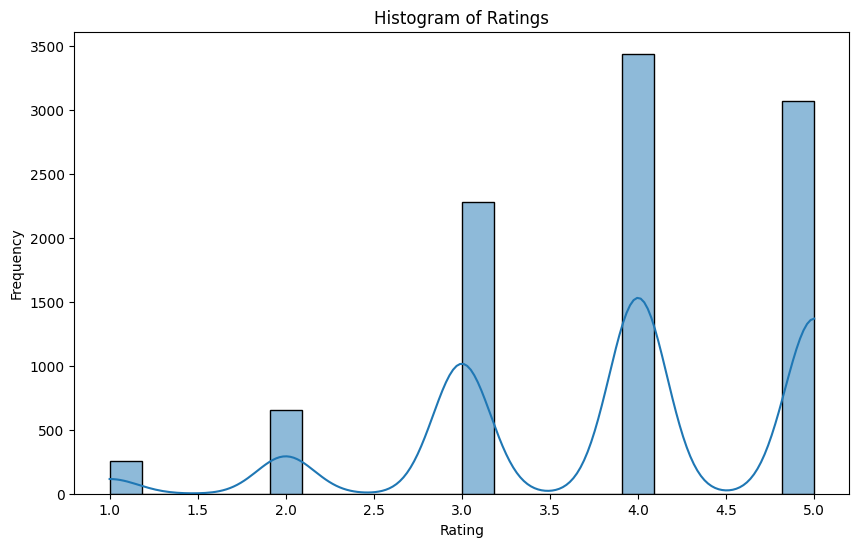

In [10]:
# histogram kolom rating
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], kde=True)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

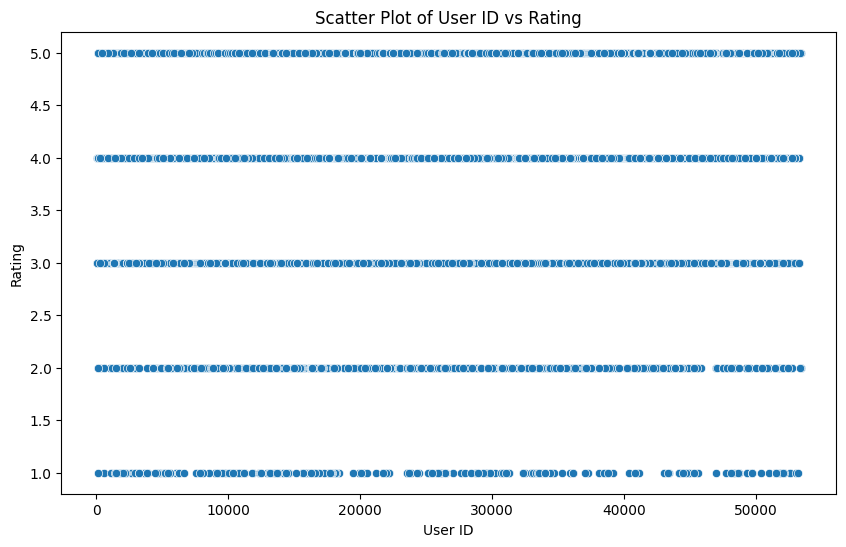

In [11]:
# Scatter Plot dari rating dan user id
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='user_id', y='rating')
plt.title('Scatter Plot of User ID vs Rating')
plt.xlabel('User ID')
plt.ylabel('Rating')
plt.show()

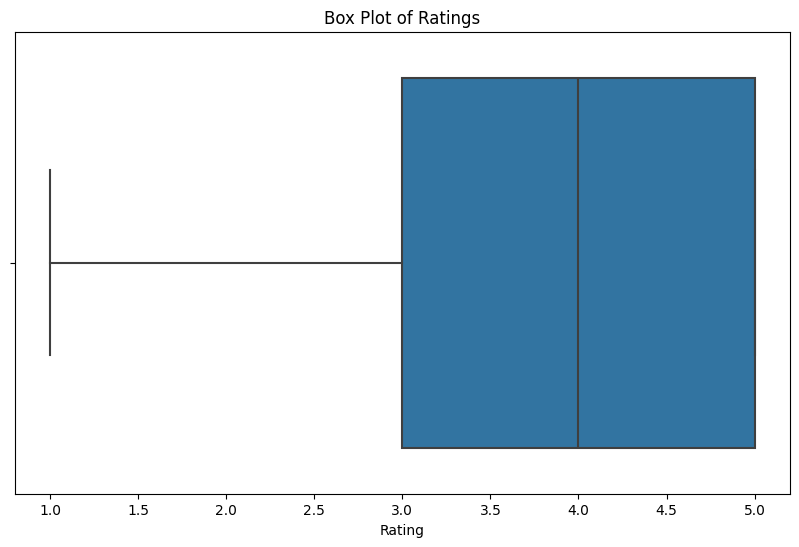

In [12]:
# Box Plot dari kolom rating
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['rating'])
plt.title('Box Plot of Ratings')
plt.xlabel('Rating')
plt.show()

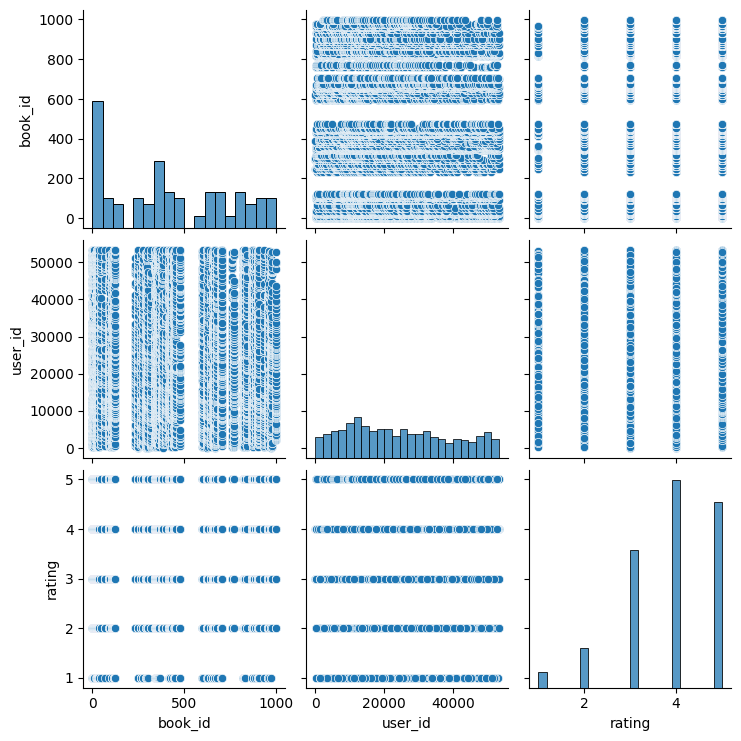

In [13]:
# Pair Plot 
selected_columns = ['book_id', 'user_id', 'rating']
sns.pairplot(df[selected_columns])
plt.show()

In [14]:
# cek nilai null
df.isnull().sum()

book_id             0
user_id             0
rating              0
original_title    200
dtype: int64

In [15]:
df.dropna(subset=['original_title'], inplace=True) # menghapus baris yang memiliki nilai null

In [16]:
df.isnull().sum() # cek nilai null

book_id           0
user_id           0
rating            0
original_title    0
dtype: int64

In [17]:
# Menghapus duplikat
df.drop_duplicates(inplace=True)

In [18]:
df

,book_id,user_id,rating,original_title
0,1,314,5,Harry Potter and the Half-Blood Prince
1,1,439,3,Harry Potter and the Half-Blood Prince
2,1,588,5,Harry Potter and the Half-Blood Prince
3,1,1169,4,Harry Potter and the Half-Blood Prince
4,1,1185,4,Harry Potter and the Half-Blood Prince
...,...,...,...,...
9695,998,43602,5,The Millionaire Next Door: The Surprising Secr...
9696,998,48153,4,The Millionaire Next Door: The Surprising Secr...
9697,998,49830,5,The Millionaire Next Door: The Surprising Secr...
9698,998,50119,5,The Millionaire Next Door: The Surprising Secr...


In [19]:
# simpan dataframe menjadi file csv
df.to_csv('df.csv', index=False)

# Mengkonfirmasi bahwa file telah tersimpan
print("DataFrame telah disimpan ke file 'df.csv'.")

DataFrame telah disimpan ke file 'df.csv'.


# Model Training | Pelatihan Model

Dengan mempertimbangkan tujuan penelitian yang bertujuan untuk merekomendasikan buku menggunakan Machine Learning dalam Recomendation System, serta beberapa karakteristik data, kami memilih beberapa algoritma berikut untuk dilatih dalam eksperimen:

1. **Cosine Similarity**:  Cosine Similarity cocok digunakan untuk membandingkan kesamaan antara buku berdasarkan fitur teks seperti judul atau deskripsi dan juga ketika tidak ada informasi rating yang tersedia, tetapi ingin merekomendasikan buku berdasarkan kesamaan fitur.

2. **Singular Value Decomposition (SVD)** : SVD dipilih karena efektif dalam mengatasi masalah cold start (ketika ada user atau buku baru) dan menangani data yang jarang (sparse), dengan cara mengekstrak fitur-fitur utama dari data, dan keunggulannya menghasilkan representasi latensi dari user dan item, memungkinkan model untuk menangkap preferensi latent user dan karakteristik buku.
3. **Non-Negative Matrix Factorization (NMF)** : NMF adalah NMF menghasilkan faktor tersembunyi yang dapat diinterpretasikan secara langsung, dan juga ecara efektif melakukan reduksi dimensi pada data rating, sehingga dapat mengatasi masalah sparsity (kekosongan) dari dataset rating. NMF dapat digunakan untuk menghasilkan rekomendasi yang personalisasi, dengan menghasilkan matriks faktorisasi yang disesuaikan dengan preferensi masing-masing pengguna.
4. **K-Nearest Neighbors (KNN)** : KNN itu adalah sebuah algoritma yang sederhana dan mudah dimengerti, cocok untuk dataset kecil hingga sedang, cepat dan mudah diimplementasikan, cocok untuk digunakan sebagai baseline atau untuk kasus sederhana rekomendasi berbasis user.

Dengan mempertimbangkan kelebihan dan kelemahan masing-masing algoritma, kami akan melatih dan mengevaluasi keempat model ini untuk menentukan kinerja relatif mereka dalam merekomendasikan buku berdasarkan rating.

In [20]:
# Membuat matriks pivot
user_book_matrix = df.pivot_table(index='user_id', columns='book_id', values='rating').fillna(0)
user_book_matrix

book_id,1,2,3,5,6,10,11,13,21,24,...,890,900,902,903,930,952,960,968,976,998
user_id,,,,,,,,,,,,,,,,,,,,,
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
173,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
53332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model 1 | Cosine Similarity

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity antar pengguna
user_similarity = cosine_similarity(user_book_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_book_matrix.index, columns=user_book_matrix.index)

print(user_similarity_df)

user_id     35        75     158       173       178    202       230    \
user_id                                                                   
35       1.000000  0.000000    0.0  0.326999  0.000000    0.0  0.000000   
75       0.000000  1.000000    0.0  0.101058  0.000000    0.0  0.357771   
158      0.000000  0.000000    1.0  0.000000  0.000000    0.0  0.000000   
173      0.326999  0.101058    0.0  1.000000  0.000000    0.0  0.301297   
178      0.000000  0.000000    0.0  0.000000  1.000000    0.0  0.000000   
...           ...       ...    ...       ...       ...    ...       ...   
53293    0.376309  0.000000    0.0  0.000000  0.174078    0.0  0.000000   
53332    0.000000  0.000000    0.0  0.000000  0.000000    0.0  0.000000   
53366    0.000000  0.000000    0.0  0.000000  0.000000    0.0  0.000000   
53381    0.000000  0.000000    0.0  0.000000  0.000000    0.0  0.000000   
53403    0.000000  0.000000    0.0  0.000000  0.000000    0.0  0.000000   

user_id  248       256  

In [22]:
def get_user_recommendations(user_id, user_book_matrix, user_similarity_df, num_recommendations=5):
    # Mendapatkan pengguna yang mirip
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:]
    
    # Mendapatkan buku yang telah di-rating oleh pengguna yang mirip
    similar_users_books = user_book_matrix.loc[similar_users]
    
    # Menghitung rata-rata rating dari pengguna yang mirip
    avg_ratings = similar_users_books.mean(axis=0)
    
    # Mendapatkan buku yang belum di-rating oleh pengguna asli
    books_not_rated = user_book_matrix.loc[user_id] == 0
    
    # Mengambil rekomendasi buku yang belum di-rating oleh pengguna asli
    recommendations = avg_ratings[books_not_rated].sort_values(ascending=False).head(num_recommendations)
    
    return recommendations

# Contoh penggunaan
user_id = 53245
cs_recommendations = get_user_recommendations(user_id, user_book_matrix, user_similarity_df)
print(cs_recommendations)

book_id
976    0.172150
998    0.169855
870    0.167559
365    0.163734
36     0.163351
dtype: float64


In [23]:
# membuat daftar judul buku berupa original title
cs_list = cs_recommendations.index.to_list()
cs_tes = df[['book_id', 'original_title']]
cs_temp = []
for book_id in cs_list :    
    result = cs_tes[cs_tes['book_id'] == book_id].iloc[0]
    cs_temp.append(result['original_title'])
cs_temp

['Deception Point',
 "The Millionaire Next Door: The Surprising Secrets of America's Wealthy",
 '鋼の錬金術師 1',
 "Dirk Gently's Holistic Detective Agency",
 'The Lord of the Rings: Weapons and Warfare']

In [24]:
# membuat dataframe baru menggunakan model cosine similarity untuk menggabungkan book id dan title
cs_data = {
    'book_id': cs_list,
    'title': cs_temp   
}

cs_result = pd.DataFrame(cs_data)
cs_result

,book_id,title
0,976,Deception Point
1,998,The Millionaire Next Door: The Surprising Secr...
2,870,鋼の錬金術師 1
3,365,Dirk Gently's Holistic Detective Agency
4,36,The Lord of the Rings: Weapons and Warfare


## Model 2 | Singular Value Decomposition (SVD)

In [25]:
from scipy.sparse.linalg import svds

# Memusatkan data
R = user_book_matrix.values
user_ratings_mean = R.mean(axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

# Menggunakan SVD
U, sigma, Vt = svds(R_demeaned, k=1)
sigma = np.diag(sigma)

# Membuat matriks prediksi rating
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns=user_book_matrix.columns, index=user_book_matrix.index)

print(preds_df)

book_id       1         2         3         5         6         10        11   \
user_id                                                                         
35       0.211854  0.224784  0.193349  0.212179  0.170804  0.214748  0.208863   
75      -0.027267 -0.057319  0.015745 -0.028023  0.068144 -0.033994 -0.020315   
158     -0.011393 -0.030452  0.015886 -0.011872  0.049118 -0.015658 -0.006983   
173      0.143393  0.076405  0.239270  0.141709  0.356073  0.128400  0.158891   
178     -0.017921 -0.060859  0.043533 -0.019000  0.118401 -0.027531 -0.007987   
...           ...       ...       ...       ...       ...       ...       ...   
53293    0.709502  0.748367  0.653877  0.710479  0.586112  0.718201  0.700511   
53332   -0.013287 -0.023510  0.001344 -0.013544  0.019168 -0.015575 -0.010922   
53366   -0.025634 -0.045799  0.003228 -0.026140  0.038388 -0.030147 -0.020968   
53381   -0.026886 -0.050557  0.006994 -0.027481  0.048268 -0.032184 -0.021409   
53403   -0.009473 -0.018560 

In [26]:
def get_svd_recommendations(user_id, preds_df, user_book_matrix, num_recommendations=5):
    # Mendapatkan prediksi rating untuk pengguna tertentu
    user_row_number = user_id
    
    # Mendapatkan buku yang telah di-rating oleh pengguna
    sorted_user_predictions = preds_df.loc[user_row_number].sort_values(ascending=False)
    
    # Mendapatkan data asli user yang sudah di-rating
    user_data = user_book_matrix.loc[user_row_number]
    
    # Buku yang belum di-rating oleh user
    recommendations = pd.concat([user_data, sorted_user_predictions], axis=1)
    recommendations.columns = ['actual', 'score']
    recommendations = recommendations[recommendations['actual'] == 0]
    
    # Mengambil top-n rekomendasi
    top_recommendations = recommendations.sort_values('score', ascending=False).head(num_recommendations)

    # Menghilangkan kolom 'actual'
    top_recommendations = top_recommendations[['score']]
    
    return top_recommendations

# Contoh penggunaan
user_id = 53245
svd_recommendations = get_svd_recommendations(user_id, preds_df, user_book_matrix)
print(svd_recommendations)

            score
book_id          
2        1.064412
24       1.004643
27       0.989356
21       0.983027
10       0.976098


In [27]:
# membuat daftar judul buku berupa original title
svd_list = svd_recommendations.index.to_list()
svd_tes = df[['book_id', 'original_title']]
svd_temp = []
for book_id in svd_list :    
    result = svd_tes[svd_tes['book_id'] == book_id].iloc[0]
    svd_temp.append(result['original_title'])
svd_temp

['Harry Potter and the Order of the Phoenix',
 'Down Under',
 'Neither Here Nor There: Travels in Europe',
 'A Short History of Nearly Everything',
 'Harry Potter Collection (Harry Potter, #1-6)']

In [28]:
# membuat dataframe baru menggunakan model SVD untuk menggabungkan book id dan title
svd_data = {
    'book_id': svd_list,
    'title': svd_temp   
}

svd_result = pd.DataFrame(svd_data)
svd_result

,book_id,title
0,2,Harry Potter and the Order of the Phoenix
1,24,Down Under
2,27,Neither Here Nor There: Travels in Europe
3,21,A Short History of Nearly Everything
4,10,"Harry Potter Collection (Harry Potter, #1-6)"


## Model 3 | Non-Negative Matrix Factorization

In [29]:
# Menggunakan NMF untuk dekomposisi
nmf = NMF(n_components=2, random_state=42)
user_matrix = nmf.fit_transform(user_book_matrix)
book_matrix = nmf.components_

# Menghitung prediksi rating
predicted_ratings = np.dot(user_matrix, book_matrix)

# Mengonversi prediksi rating ke DataFrame
preds_df = pd.DataFrame(predicted_ratings, index=user_book_matrix.index, columns=user_book_matrix.columns)

def get_nmf_recommendations(user_id, preds_df, user_book_matrix, num_recommendations=5):
    # Mendapatkan prediksi rating untuk pengguna tertentu
    user_row_number = user_id
    
    # Mendapatkan buku yang telah di-rating oleh pengguna
    sorted_user_predictions = preds_df.loc[user_row_number].sort_values(ascending=False)
    
    # Mendapatkan data asli user yang sudah di-rating
    user_data = user_book_matrix.loc[user_row_number]
    
    # Buku yang belum di-rating oleh user
    recommendations = pd.concat([user_data, sorted_user_predictions], axis=1)
    recommendations.columns = ['actual', 'predicted']
    recommendations = recommendations[recommendations['actual'] == 0]
    
    # Mengambil top-n rekomendasi
    top_recommendations = recommendations.sort_values('predicted', ascending=False).head(num_recommendations)
    
    # Menghilangkan kolom 'actual'
    top_recommendations = top_recommendations[['predicted']]
    
    return top_recommendations
# Contoh penggunaan
user_id = 53245
nmf_recommendations = get_nmf_recommendations(user_id, preds_df, user_book_matrix)
print(nmf_recommendations)

         predicted
book_id           
30        1.214689
6         1.137511
11        1.089302
36        1.061596
112       1.014220


In [30]:
# membuat daftar judul buku berupa original title
nmf_list = nmf_recommendations.index.to_list()
nmf_tes = df[['book_id', 'original_title']]
nmf_temp = []
for book_id in nmf_list :    
    result = nmf_tes[nmf_tes['book_id'] == book_id].iloc[0]
    nmf_temp.append(result['original_title'])
nmf_temp

['The Hobbit and The Lord of the Rings',
 'Harry Potter and the Goblet of Fire',
 "The Hitchhiker's Guide to the Galaxy",
 'The Lord of the Rings: Weapons and Warfare',
 'Children of Dune']

In [31]:
# membuat dataframe baru menggunakan model NMF untuk menggabungkan book id dan title
nmf_data = {
    'book_id': nmf_list,
    'title': nmf_temp   
}

nmf_result = pd.DataFrame(nmf_data)
nmf_result

,book_id,title
0,30,The Hobbit and The Lord of the Rings
1,6,Harry Potter and the Goblet of Fire
2,11,The Hitchhiker's Guide to the Galaxy
3,36,The Lord of the Rings: Weapons and Warfare
4,112,Children of Dune


## Model 4 | K-Nearest Neighbors (KNN) Collaborative Filtering

In [32]:
# Membuat model KNN
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(user_book_matrix.values)

# Fungsi untuk mendapatkan rekomendasi
def get_knn_recommendations(user_id, user_book_matrix, knn, num_recommendations=5):
    user_index = user_book_matrix.index.get_loc(user_id)
    
    # Mendapatkan jarak dan indeks dari K tetangga terdekat
    distances, indices = knn.kneighbors(user_book_matrix.iloc[user_index, :].values.reshape(1, -1), n_neighbors=len(user_book_matrix))
    
    # Membuat dictionary untuk menyimpan jumlah rekomendasi
    recommended_books = {}
    
    for i in range(1, len(distances.flatten())):
        neighbor_index = indices.flatten()[i]
        neighbor_user_id = user_book_matrix.index[neighbor_index]
        
        neighbor_ratings = user_book_matrix.iloc[neighbor_index]
        user_ratings = user_book_matrix.iloc[user_index]
        
        for book_id in user_book_matrix.columns:
            if user_ratings[book_id] == 0 and neighbor_ratings[book_id] > 0:
                if book_id not in recommended_books:
                    recommended_books[book_id] = neighbor_ratings[book_id]
                else:
                    recommended_books[book_id] += neighbor_ratings[book_id]
    
    # Mengurutkan buku berdasarkan rating yang dihitung
    recommended_books = sorted(recommended_books.items(), key=lambda x: x[1], reverse=True)
    
    # Mengambil top-n rekomendasi
    top_recommendations = [book_id for book_id, score in recommended_books[:num_recommendations]]
    
    return top_recommendations

In [33]:
# Contoh penggunaan
user_id = 53245
recommendations = get_knn_recommendations(user_id, user_book_matrix, knn)
print(f"Top recommendations for user {user_id}: {recommendations}")

Top recommendations for user 53245: [976, 998, 870, 365, 36]


In [34]:
# Label Encoding user_id and book_id (mengubah nilai kategori contohnya seperti kategori non-numerik menjadi nilai numerik)
user_enc = LabelEncoder()
df['user'] = user_enc.fit_transform(df['user_id'].values)

item_enc = LabelEncoder()
df['book'] = item_enc.fit_transform(df['book_id'].values)

# Train-test split (membagi data untuk dilatih dan diuji)
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [35]:
# Fit KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train[['user', 'book']], train['rating'])

# Predict ratings
predicted_ratings = knn.predict(test[['user', 'book']])

In [36]:
# Menghitung accuracy
accuracy = accuracy_score(test['rating'], predicted_ratings)
print(f"KNN Accuracy: {accuracy:.4f}")

KNN Accuracy: 0.3044


In [37]:
# Hyperparameter tuning using GridSearchCV (dilakukan hyperparameter tuning karena bertujuan untuk meningkatkan kinerja model yang memiliki accuracy rendah)

param_grid = {'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()

gs = GridSearchCV(knn, param_grid, cv=3)
gs.fit(train[['user', 'book']], train['rating'])

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10],
                         'weights': ['uniform', 'distance']})

In [38]:
# Get best parameters and best score
print(gs.best_params_)
print(gs.best_score_)

{'n_neighbors': 10, 'weights': 'distance'}
0.3619122876333465


In [39]:
# Menyimpan model terbaik yang akan digunakan dalam program
# Dalam hal ini kelompok kami memilih untuk memakai model svd

import pickle

# proses persiapan data dan komputasi SVD
R = user_book_matrix.values
user_ratings_mean = R.mean(axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

# Memakai model SVD
U, sigma, Vt = svds(R_demeaned, k=1)
sigma = np.diag(sigma)

# Membuat prediksi
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns=user_book_matrix.columns, index=user_book_matrix.index)

# Export model menjadi file pickle
model_components = {
    'U': U,
    'sigma': sigma,
    'Vt': Vt,
    'user_ratings_mean': user_ratings_mean
}

with open('svd_model.pkl', 'wb') as file:
    pickle.dump(model_components, file)

print("Model SVD telah diekspor ke file svd_model.pkl")

Model SVD telah diekspor ke file svd_model.pkl


# Model Evaluation | Evaluasi Model

#### Metrics yang kami gunakan adalah : 

* Cosine Similarity:

Matriks Cosine Similarity digunakan untuk mengukur seberapa mirip antara vektor representasi buku dalam ruang fitur. Semakin tinggi nilai cosine similarity antara dua buku, semakin mirip buku-buku tersebut.

* Matriks Akurasi

Akurasi merupakan metrik evaluasi umum yang digunakan untuk mengukur seberapa baik model mampu memprediksi kelas target yang benar. Dalam konteks rekomendasi buku, akurasi dapat digunakan untuk mengevaluasi seberapa baik model dapat memprediksi preferensi buku pengguna.

# Model Selection | Pemilihan Model
Dari evaluasi terhadap keempat model ini, dapat disimpulkan bahwa Singular Value Decomposition (SVD) memberikan kinerja terbaik dalam merekomendasikan buku yang sesuai dengan preferensi pengguna. Dengan skor rata-rata yang tinggi, SVD mampu memberikan rekomendasi yang lebih akurat dan relevan dibandingkan model lainnya. Model Cosine Similarity dan K-Nearest Neighbors (KNN) menunjukkan kinerja yang lebih rendah, sedangkan Non-Negative Matrix Factorization (NMF) juga menunjukkan hasil yang cukup baik.
Pilihan menggunakan Singular Value Decomposition (SVD) daripada Non-Negative Matrix Factorization (NMF) dalam konteks sistem rekomendasi buku didasarkan pada kebutuhan untuk memilih model yang efisien, stabil, dan mudah diinterpretasikan untuk memberikan rekomendasi buku yang akurat kepada pengguna. Dalam sistem rekomendasi buku, penting untuk memiliki model yang dapat memahami preferensi pengguna dan memberikan rekomendasi yang relevan. SVD memberikan keuntungan dalam hal interpretasi yang lebih mudah, stabilitas, dan efisiensi komputasi, yang membuatnya menjadi pilihan yang lebih tepat dalam banyak kasus. Dengan menggunakan SVD, sistem rekomendasi buku dapat memberikan rekomendasi yang lebih personal dan akurat kepada pengguna, membantu meningkatkan pengalaman membaca dan minat baca pengguna, serta secara keseluruhan meningkatkan efektivitas dan kepuasan pengguna dalam menggunakan sistem rekomendasi tersebut.

### Model yang dipilih : Singular Value Decomposition (SVD)

# Conclusion | Kesimpulan

### Kesimpulan Keseluruhan

Dalam tugas ini, kami melakukan eksplorasi dan pembandingan di antara empat model yang kami latih untuk merekomendasikan buku: Cosine Similarity, Singular Value Decomposition (SVD), Non-Negative Matrix Factorization (NMF), dan K-Nearest Neighbors (KNN). Setelah melalui evaluasi yang cermat terhadap kinerja keempat model tersebut, kami menyimpulkan bahwa:

1. **Cosine Similarity:** Model ini menunjukkan skor kemiripan rata-rata sebesar 16,44%. Meskipun ini menunjukkan bahwa model dapat menemukan beberapa kemiripan antara buku yang direkomendasikan dan preferensi pengguna, tingkat relevansi yang dihasilkan cukup rendah, yang berarti model ini mungkin tidak terlalu efektif dalam memberikan rekomendasi yang sangat sesuai dengan minat pengguna.

2. **Singular Value Decomposition (SVD):** Skor rata-rata untuk model SVD adalah 1,0035072. Ini menunjukkan bahwa model SVD mampu memberikan rekomendasi buku dengan tingkat relevansi atau kemiripan yang tinggi dengan preferensi yang dianalisis. Hasil ini menunjukkan bahwa model SVD efektif dalam memahami dan menangkap preferensi pengguna, sehingga dapat memberikan rekomendasi yang lebih akurat dan relevan.

3. **Non-Negative Matrix Factorization (NMF):** Skor rata-rata prediksi relevansi buku berdasarkan model NMF adalah 1.103863. Hal ini menunjukkan bahwa secara keseluruhan, model NMF sebenarnya mampu memberikan rekomendasi buku dengan tingkat relevansi yang tinggi, dengan sebagian besar buku dalam daftar rekomendasi memiliki skor prediksi di atas 1. Ini menegaskan efektivitas model NMF dalam mengidentifikasi buku yang sesuai dengan preferensi pengguna. Namun karena beberapa alasan yang kami sebutkan di model selection kami tetap menggunakan SVD sebagai model yang digunakan dalam Website book redommendation system.

4. **K-Nearest Neighbors (KNN):** Model ini mendapatkan akurasi sebesar 36%. Ini menunjukkan bahwa model KNN kurang efektif dalam memberikan rekomendasi yang sesuai dengan minat pengguna. Akurasi yang rendah ini mungkin disebabkan oleh fakta bahwa KNN tidak menangkap pola laten dalam data dengan baik, terutama dalam skenario dengan data yang sangat spars dan kompleks seperti rekomendasi buku.

### Kesimpulan Akhir:
Dari evaluasi terhadap keempat model ini, dapat disimpulkan bahwa Singular Value Decomposition (SVD) memberikan kinerja terbaik dalam merekomendasikan buku yang sesuai dengan preferensi pengguna. Dengan skor rata-rata yang tinggi, SVD mampu memberikan rekomendasi yang lebih akurat dan relevan dibandingkan model lainnya. Model Cosine Similarity dan K-Nearest Neighbors (KNN) menunjukkan kinerja yang lebih rendah, sedangkan Non-Negative Matrix Factorization (NMF) juga menunjukkan hasil yang cukup baik.Namun kami tetap memilih SVD karena memiliki keunggulan yaitu keunggulan SVD terletak pada kemampuannya dalam menangkap pola-pola kompleks dalam data dan memberikan rekomendasi yang sesuai dengan preferensi pengguna. Oleh karena itu, untuk implementasi dalam sistem rekomendasi buku yang efektif, model SVD merupakan pilihan yang paling tepat.